In [ ]:
# default_exp plots

In [ ]:
# plots

In [ ]:
# export

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# export

def compare_plots(df,column1,column2,name1,name2,value_name,
                  output,hue,logscale=False,xlim=None,ylim=None):
    '''

    :param df:
    :param column1:
    :param column2:
    :param name1:
    :param name2:
    :param output:
    :param hue:
    :param logscale:
    :return:
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9), tight_layout=True)
    jp = sns.scatterplot(x=column1, y=column2, data=df,ax=ax1,hue=hue)
    lim=max(df[column1].max(),df[column2].max())
    rm_na_df = df[[column1,column2]].dropna()
    cor,p = stats.pearsonr(rm_na_df[column1],rm_na_df[column2])
    jp.annotate(text='COR=%.2f,p=%.2f' % (cor,p) ,xy=(0,lim),xycoords='data')
    jp.set_xlabel(name1)
    jp.set_ylabel(name2)
    jp.set_title(f'Scatter plots of {value_name} in {name1} and {name2}')
    if None is xlim:
        jp.set_xlim(0,lim+1)
    else:
        jp.set_xlim(*xlim)
    if None is ylim:
        jp.set_xlim(0,lim+1)
    else:
        jp.set_ylim(*ylim)
    tmp=df.rename(columns={column1:name1,column2:name2}).melt(id_vars=None,
                                                              value_vars=[name1,name2],
                                                              var_name='class',
                                        value_name=value_name)
    vp =sns.violinplot(x='class', y=value_name,data=tmp,ax=ax2)
    vp.set_title(f'Violin plot of {value_name} in {name1} and {name2}')
    if logscale:
        jp.set(xscale='log',yscale='log')
        vp.set(yscale='log')
    fig.savefig(output,dpi=1200)

In [ ]:
import pandas as pd

# df = pd.read_csv('/mnt/d/Codes/bitk/tests/random.txt',sep='\t',index_col=0)
# df.head()
# df=df*200000000

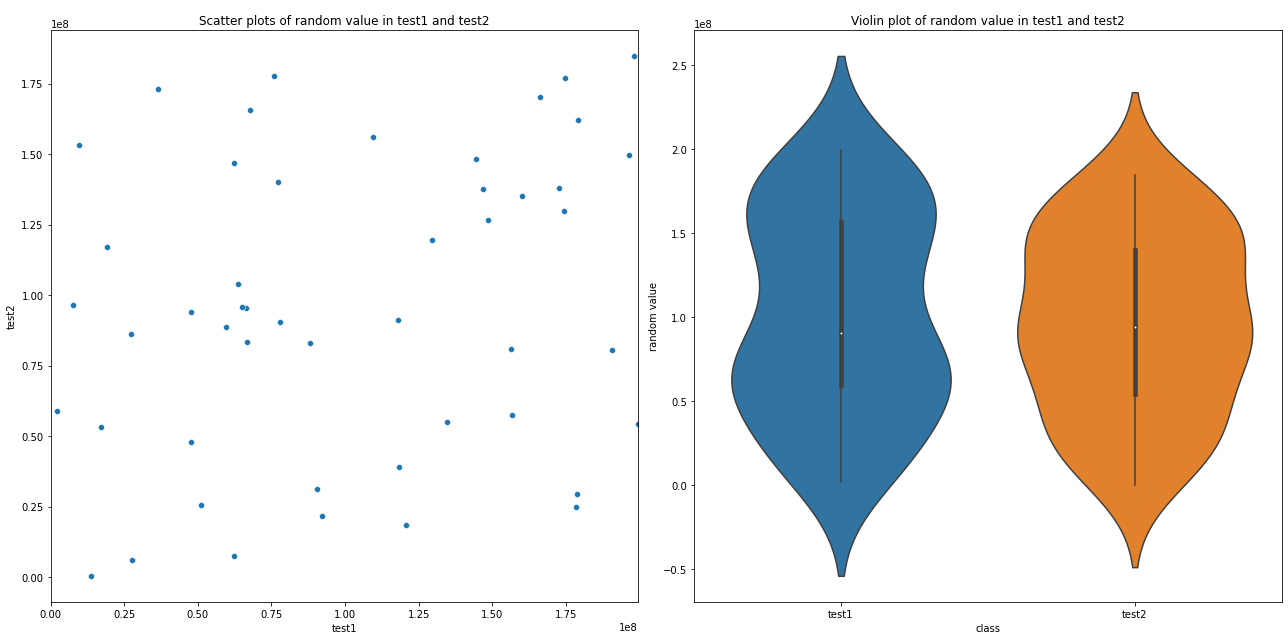

In [ ]:
# compare_plots(df,'random1','random2','test1','test2',
            #   'random value','/mnt/d/Codes/bitk/tests/fig_compare.png',None,False,(0,2000000))

In [ ]:
from nbdev.export import notebook2script
notebook2script()